In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.models import Model, Input
from keras.optimizers import Adam
from keras.preprocessing import image

Using TensorFlow backend.


 Images 

In [0]:
Images = []; Blurry = []
for num in range(1,722):
        image_path='gdrive/My Drive/test_data/CNN-L15/0 ('+str(num)+').jpg'
        image_path2='gdrive/My Drive/test_data/blurred/0 ('+str(num)+').png'
        img = image.load_img(image_path, target_size=(64, 64)) 
        img2 = image.load_img(image_path2, target_size=(64, 64))
        x = np.array(img) 
        x2 = np.array(img2)
        Images.append(x)
        Blurry.append(x2)

In [0]:
Images = np.array(Images).astype('float32')
Blurry = np.array(Blurry).astype('float32')

In [4]:
Images[0].shape

(64, 64, 3)

In [0]:
# np.save('gdrive/My Drive/test_data/Images_64.npy', Images)
# np.save('gdrive/My Drive/test_data/Blurry_64.npy', Blurry)

In [0]:
Images=np.load('gdrive/My Drive/test_data/Images_64.npy')
Blurry=np.load('gdrive/My Drive/test_data/Blurry_64.npy')

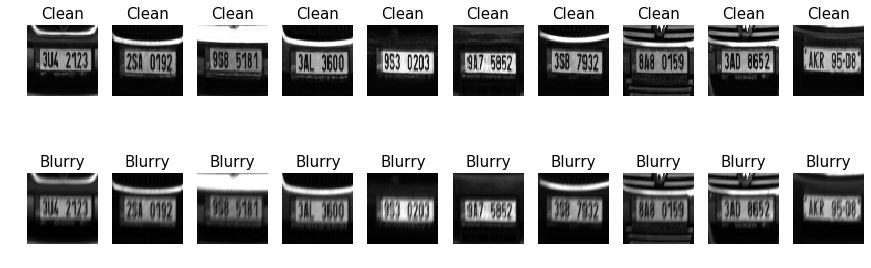

In [4]:
f, ax = plt.subplots(2,10,figsize=(15,5))
for i in range(10):
    ax[0,i].imshow(Images[i].astype('uint8'),cmap='gray');  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'),cmap='gray');  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
plt.show()

CNN architecture

In [6]:
Imginput = Input(shape=(64,64,3))

l1 = Conv2D(filters=128, kernel_size=19, strides = 1, padding='same')(Imginput)
l1 = BatchNormalization()(l1)
l1 = Activation('relu')(l1)

l2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(l1)
l2 = BatchNormalization()(l2)
l2 = Activation('relu')(l2)

l3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(l2)
l3 = BatchNormalization()(l3)
l3 = Activation('relu')(l3)

l4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(l3)
l4 = BatchNormalization()(l4)
l4 = Activation('relu')(l4)

l5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(l4)
l5 = BatchNormalization()(l5)
l5 = Activation('relu')(l5)

l6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(l5)
l6 = BatchNormalization()(l6)
l6 = Activation('relu')(l6)

l7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(l6)
l7 = BatchNormalization()(l7)
l7 = Activation('relu')(l7)

l8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(l7)
l8 = BatchNormalization()(l8)
l8 = Activation('relu')(l8)

l9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(l8)
l9 = BatchNormalization()(l9)
l9 = Activation('relu')(l9)

l10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(l9)
l10 = BatchNormalization()(l10)
l10 = Activation('relu')(l10)

l11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(l10)
l11 = BatchNormalization()(l11)
l11 = Activation('relu')(l11)

l12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(l11)
l12 = BatchNormalization()(l12)
l12 = Activation('relu')(l12)

l13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(l12)
l13 = BatchNormalization()(l13)
l13 = Activation('relu')(l13)

l14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(l13)
l14 = BatchNormalization()(l14)
l14 = Activation('relu')(l14)

Imgoutput = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(l14)

model = Model(inputs= Imginput, outputs=Imgoutput )

W0720 09:31:09.693076 140097337321344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 09:31:09.737720 140097337321344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 09:31:09.745221 140097337321344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 09:31:09.782078 140097337321344 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0720 09:31:09.783040 1400973373

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       138752    
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 320)       41280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 320)       1280      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 320)       0         
__________

In [0]:
adam = Adam()
def train(batch_size, epoch_num):
  model.compile(optimizer= adam, loss= 'mean_squared_error')
  model.fit(Blurry[72:648], Images[72:648], epochs=epoch_num, validation_data=(Blurry[648:721], Images[648:721]), batch_size=batch_size)
 

In [0]:
#model.save_weights('gdrive/My Drive/My_deblur_cnn_weights_64_new.h5', True)

In [12]:
train(10,100)

Train on 576 samples, validate on 73 samples
Epoch 1/100
576/576 [==============================] - 22s 37ms/step - loss: 247.4033 - val_loss: 392.1266
Epoch 2/100
576/576 [==============================] - 13s 22ms/step - loss: 164.5703 - val_loss: 371.1538
Epoch 3/100
576/576 [==============================] - 13s 22ms/step - loss: 176.3368 - val_loss: 366.0730
Epoch 4/100
576/576 [==============================] - 13s 22ms/step - loss: 147.9721 - val_loss: 340.3684
Epoch 5/100
576/576 [==============================] - 13s 22ms/step - loss: 142.7680 - val_loss: 327.9286
Epoch 6/100
576/576 [==============================] - 13s 22ms/step - loss: 131.7804 - val_loss: 302.6609
Epoch 7/100
576/576 [==============================] - 13s 22ms/step - loss: 127.2377 - val_loss: 287.2177
Epoch 8/100
576/576 [==============================] - 13s 22ms/step - loss: 120.3008 - val_loss: 304.1944
Epoch 9/100
576/576 [==============================] - 13s 23ms/step - loss: 115.0226 - val_loss: 2

Train on 576 samples, validate on 73 samples
Epoch 1/10
 576/576 [==============================] - 2475s 3s/step - loss: 1831.4655
 
 Train on 576 samples, validate on 73 samples
Epoch 2/10
 576/576 [==============================] - 2478s 3s/step - loss: 1038.7865
 
 Train on 576 samples, validate on 73 samples
Epoch 3/10
 576/576 [==============================] - 2470s 3s/step - loss: 810.4568
 
 Train on 576 samples, validate on 73 samples
Epoch 4/10
 576/576 [==============================] - 2481s 3s/step - loss: 644.3575
 
 Train on 576 samples, validate on 73 samples
Epoch 5/10
 576/576 [==============================] - 2478s 3s/step - loss: 501.8799
 
 Train on 576 samples, validate on 73 samples
Epoch 6/10
 576/576 [==============================] - 2475s 3s/step - loss: 443.6875
 
 Train on 576 samples, validate on 73 samples
Epoch 7/10
 576/576 [==============================] - 2480s 3s/step - loss: 398.3367
 
 Train on 576 samples, validate on 73 samples
Epoch 8/10
 576/576 [==============================] - 2479s 3s/step - loss: 358.7966
 
 Train on 576 samples, validate on 73 samples
Epoch 9/10
 576/576 [==============================] - 2477s 3s/step - loss: 322.8990
 
 Train on 576 samples, validate on 73 samples
Epoch 10/10
 576/576 [==============================] - 2472s 3s/step - loss: 288.5476

248*128

Train on 576 samples, validate on 73 samples
Epoch 1/1
576/576 [==============================] - 12490s 22s/step - loss: 109425.7327 - PSNR: inf - acc: 0.9951 - val_loss: 9010.4688 - val_PSNR: inf - val_acc: 0.9998

Train on 576 samples, validate on 73 samples
Epoch 1/1
575/576 [============================>.] - ETA: 20s - loss: 10716.4228 - PSNR: inf - acc: 0.9998

In [0]:
model.load_weights('gdrive/My Drive/My_deblur_cnn_weights_64_new.h5')
Deblurred = model.predict(Blurry[0:72])

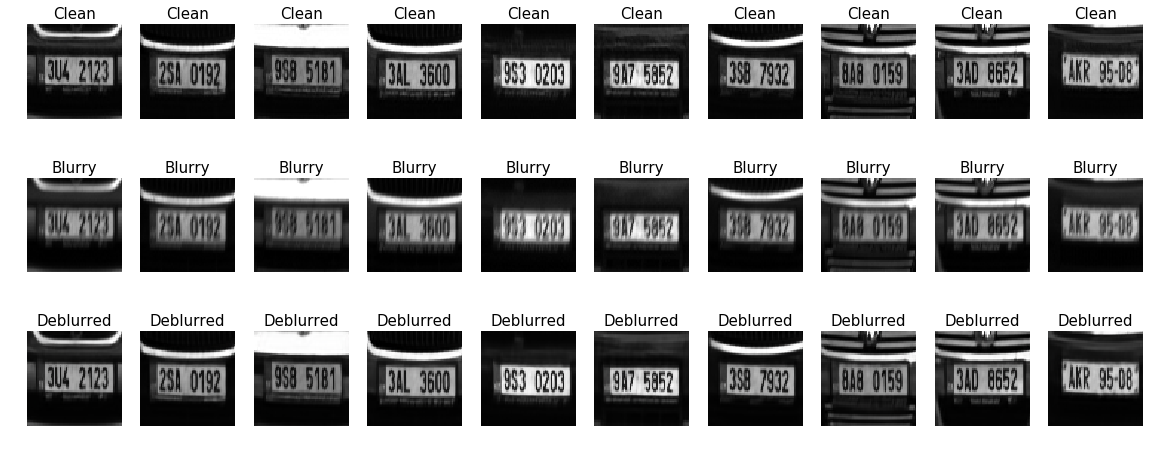

In [21]:
Deblurred = np.clip(Deblurred, 0, 255)
f, ax = plt.subplots(3,10, figsize=(20,8))
for i in range(10):
    ax[0,i].imshow(Images[i].astype('uint8'),cmap='gray');  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'),cmap='gray');  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
    ax[2,i].imshow(Deblurred[i].astype('uint8'),cmap='gray');  ax[2,i].axis('Off'); ax[2,i].set_title('Deblurred', size=15)
plt.show()

In [0]:
import math
def psnr(img, ref):
    #convert imput images to int
    _img = np.float64(np.copy(img))
    _ref = np.float64(np.copy(ref))
    mse = np.mean((_img - _ref) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 10 * math.log10((PIXEL_MAX)**2 / math.sqrt(mse))

In [22]:
P=0
N=0
for i in range(0,72):
   N=N+psnr(Images[i],Blurry[i])
   P=P+psnr(Images[i],Deblurred[i])
   #print(N,P)
P=P/72
N=N/72
print('PSNR between Image and Blurry',N,'\n PSNR between Image and Deblurred',P)

PSNR between Image and Blurry 35.75231550987694 
 PSNR between Image and Deblurred 39.48591922143637


In [23]:
from skimage.measure import compare_ssim as ssim
import tensorflow as tf
ssim_n=0
ssim_p=0
for i in range(0,72):
    ssim_n =ssim_n+ ssim(Images[i],Blurry[i],multichannel=True)
    ssim_p =ssim_p+ ssim(Images[i],Deblurred[i],multichannel=True)
    #print(ssim_n,ssim_p)
ssim_n=ssim_n/72
ssim_p=ssim_p/72
print('SSIM between Image and Blurry',ssim_n,'\n SSIM between Image and Deblurred',ssim_p)

SSIM between Image and Blurry 0.7773222123151875 
 SSIM between Image and Deblurred 0.9073961788707686
